In [1]:
!nvidia-smi

Tue Jun 23 08:04:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip3 install transformers
!pip3 install vncorenlp
!pip3 install fairseq
!pip install fastBPE
!pip install pytorch_pretrained_bert

     |████████████████████████████████| 675kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 13.8MB/s 
     |████████████████████████████████| 3.8MB 19.3MB/s 
     |████████████████████████████████| 890kB 38.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=5dc1ec72f2e0c13e310334ea6ec49d9445c35ef5008c266bcd7ecd28154762e5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 2.7MB 2.7MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645935 sha256=e1c6fe9e216322eec6f5948638fe1bb77964f7fb93c460819d7cc7c2a1dd58c3
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
  Created wheel for 

In [4]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2020-06-23 08:06:19--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 13.35.153.128, 13.35.153.25, 13.35.153.12, ...
Connecting to public.vinai.io (public.vinai.io)|13.35.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz’

PhoBERT_base_transf 100%[===================>] 307.47M  62.6MB/s    in 5.1s    

2020-06-23 08:06:24 (60.1 MB/s) - ‘PhoBERT_base_transformers.tar.gz’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt
--2020-06-23 08:06:42--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuser

In [5]:
!wget https://public.vinai.io/PhoBERT_large_transformers.tar.gz
!tar -xzvf PhoBERT_large_transformers.tar.gz

--2020-06-23 08:08:06--  https://public.vinai.io/PhoBERT_large_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 13.35.34.76, 13.35.34.70, 13.35.34.121, ...
Connecting to public.vinai.io (public.vinai.io)|13.35.34.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874534298 (834M) [application/x-tar]
Saving to: ‘PhoBERT_large_transformers.tar.gz’

PhoBERT_large_trans 100%[===================>] 834.02M  65.8MB/s    in 13s     

2020-06-23 08:08:20 (63.4 MB/s) - ‘PhoBERT_large_transformers.tar.gz’ saved [874534298/874534298]

PhoBERT_large_transformers/
PhoBERT_large_transformers/config.json
PhoBERT_large_transformers/bpe.codes
PhoBERT_large_transformers/model.bin
PhoBERT_large_transformers/dict.txt


In [6]:

import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from torch import nn
import json
import numpy as np
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from transformers import *
import torch
import matplotlib.pyplot as plt
import torch.utils.data
import torch.nn.functional as F
import argparse
from transformers.modeling_utils import *
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
from vncorenlp import VnCoreNLP
from scipy.special import softmax

In [7]:
class RobertaForClassification(BertPreTrainedModel):
   config_class = RobertaConfig
   def __init__(self, config):
       super(RobertaForClassification, self).__init__(config)
       self.num_labels = config.num_labels
       self.roberta = RobertaModel(config)
       self.qa_outputs = nn.Linear(4*config.hidden_size, self.num_labels)

       self.init_weights()

   def forward(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None,
                start_positions=None, end_positions=None):

       outputs = self.roberta(input_ids,
                            attention_mask=attention_mask,
#                            token_type_ids=token_type_ids,
                            position_ids=position_ids,
                            head_mask=head_mask)
       cls_output = torch.cat((outputs[2][-1][:,0, ...],outputs[2][-2][:,0, ...], outputs[2][-3][:,0, ...], outputs[2][-4][:,0, ...]),-1)
       logits = self.qa_outputs(cls_output)
       return logits

In [8]:
args = argparse.Namespace(
    train_path='/content/drive/My Drive/Project2/data/preprocessing/train.csv',
    test_path='/content/drive/My Drive/Project2/data/preprocessing/test.csv',
    dict_path='/content/PhoBERT_base_transformers/dict.txt',
    config_path='/content/PhoBERT_base_transformers/config.json',
    rdrsegmenter_path='/content/vncorenlp/VnCoreNLP-1.1.1.jar',
    pretrained_path='/content/PhoBERT_base_transformers/model.bin',
    max_sequence_length=256,
    batch_size=16,
    accumulation_steps=5,
    epochs=5,
    fold=5,
    seed=69,
    lr=3e-5,
    early_stop_max_epochs=3,
    ckpt_path='/content/drive/My Drive/Project2/models',
    bpe_codes='/content/PhoBERT_base_transformers/bpe.codes',
    version=3.2
)

In [9]:
class LabelEncode(object):
    def __init__(self, label=None):
        label = set(label);
        if len(label) == 0:
            token_to_idx = {}
        else:
          token_to_idx = {y:i for i, y in enumerate(sorted(label))}
        self.token_to_idx = token_to_idx
        self.idx_to_token = {i: w for w, i in token_to_idx.items()}

    def lookup_token(self, token):
        return self.token_to_idx[token]

    def lookup_index(self, index):
        if index not in self.idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self.idx_to_token[index]
    
    def transform(self, y_pred):
        return [self.lookup_index(y) for y in y_pred]

    def __len__(self):
        return len(self.token_to_idx)

In [10]:
from torch.utils.data import Dataset
class TextDataset(Dataset):
    def __init__(self, data_df, args, labelencode):
        
        self.bpe = fastBPE(args=args)
        self.data_df = data_df
        self.vocab = Dictionary()
        self.vocab.add_from_file(args.dict_path)
        self.labelencode = labelencode
        self.max_len = args.max_sequence_length
    def vectorize(self, text):
        max_sequence_length = self.max_len
        cls_id = 0
        eos_id = 2
        pad_id = 1
        subwords = self.bpe.encode('<s> ' + text + ' </s>')
        input_ids = self.vocab.encode_line(subwords, append_eos=False, add_if_not_exist=False).long().tolist()
        if len(input_ids) > max_sequence_length:
            input_ids = input_ids[:max_sequence_length]
            input_ids[-1] = eos_id
        else:
            input_ids = input_ids + [pad_id, ] * (max_sequence_length - len(input_ids))
        output = np.array(input_ids)
        return output

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        row = self.data_df.iloc[index]
        text = row.text
        x = self.vectorize(text)
        y = self.labelencode.lookup_token(row.label)
        return x, y

In [11]:
# args = parser.parse_args()
bpe = fastBPE(args)
rdrsegmenter = VnCoreNLP(args.rdrsegmenter_path, annotators="wseg", max_heap_size='-Xmx500m')


np.random.seed(1337)
torch.manual_seed(1337)
torch.cuda.manual_seed(1337)
torch.backends.cudnn.deterministic = True


test_df = pd.read_csv(args.test_path)
num_labels = len(set(test_df.label.values))
labelencode = LabelEncode(test_df.label.tolist())
test_dataset = TextDataset(test_df, args, labelencode)

In [12]:
print(len(test_dataset.vocab))

64000


In [13]:
# Load model
import timeit

start = timeit.default_timer()
config = RobertaConfig.from_pretrained(
    args.config_path,
    output_hidden_states=True,
    num_labels=num_labels
)
model_path = '/content/drive/My Drive/Project2/models/P2_phobert_256.pth'
model_state_dict = torch.load(model_path)
model_bert = torch.load(model_path)
for param in model_bert.parameters():
    param.requires_grad = False
model_bert.eval()
device = torch.device("cuda")
model_bert.to(device)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  22.421780633000026


In [14]:
def score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    print(f"Accuracy={acc:.4f}", f"  F1 score={f1:.4f}", f"  precision={precision:.4f}", f"  recall={recall:.4f}")
    return acc, f1, precision, recall

In [15]:
model_bert.eval()
running_acc = 0
test_preds = []
test_truth = []
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)
for i, (x_batch, y_batch) in enumerate(test_loader):
    torch.no_grad
    # print(x_batch)
    y_pred = model_bert(torch.tensor(x_batch, dtype=torch.long).cuda(), attention_mask=(torch.tensor(x_batch, dtype=torch.long)>0).cuda())
    y_pred = y_pred.squeeze().detach().cpu().numpy()
    y_pred = softmax(y_pred, axis=1)
    y_pred1 = np.argmax(y_pred, axis=1)
    y_batch = y_batch.numpy()
    if len(test_preds) == 0:
        test_preds = y_pred1
        test_truth = y_batch
    else:
        test_preds = np.concatenate([test_preds, y_pred1], axis=0)
        test_truth = np.concatenate([test_truth, y_batch], axis=0)

score(test_truth, test_preds)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


Accuracy=0.9102   F1 score=0.8771   precision=0.8931   recall=0.8721


(0.9101899827288429,
 0.8770516242235807,
 0.8930641742843397,
 0.8721289526266058)

In [16]:
print(test_preds)

[0 0 0 ... 9 9 9]


In [17]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          results_path='/content/drive/My Drive/Project2/results'):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(
        accuracy, misclass))
#     plt.show()
    if not os.path.exists(results_path):
        os.mkdir(results_path)
    if normalize:
        plt.savefig(results_path + '/normalize_confusion_matrix.png')
    else:
        plt.savefig(results_path+ '/confusion_matrix.png')

In [18]:
test_preds1 = test_preds.tolist()
test_truth1 = test_truth.tolist()

In [19]:
labelencode = LabelEncode(test_df.label.tolist())

In [20]:
test_preds_label = labelencode.transform(test_preds1)
test_truth_label = labelencode.transform(test_truth1)

In [21]:
classes = list(set(test_preds_label))

In [22]:
print(test_preds_label)
print(classes)

['Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'The gioi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Vi tinh', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Chinh tri Xa hoi', 'Phap luat', 'Chinh tri Xa hoi', 'Ch

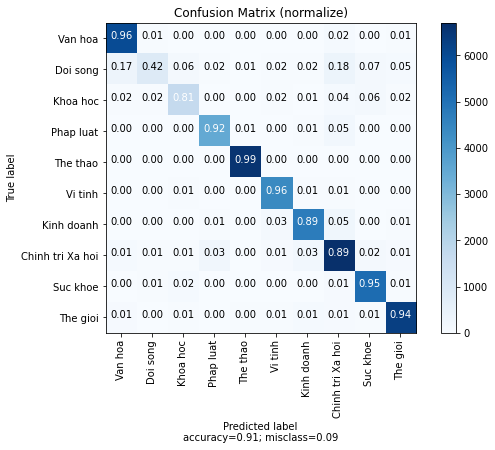

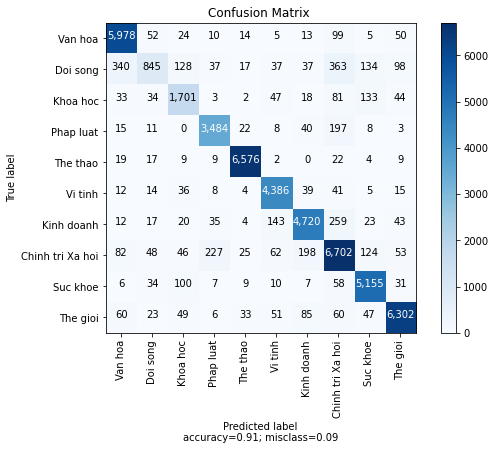

In [24]:
cm = confusion_matrix(y_true=test_truth_label, y_pred=test_preds_label, labels=classes)
plot_confusion_matrix(cm, normalize=True, target_names=classes,
                      title="Confusion Matrix (normalize)")
plot_confusion_matrix(cm, normalize=False, target_names=classes,
                      title="Confusion Matrix ")